In [1]:
import torch
import os
from torchvision import transforms
import PIL
import pickle
from tqdm import tqdm
import random
import imageio
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [16]:
dataset_folder = 'LDR-HDR-pair_Dataset-master'
HDR_folder = 'HDR'
LDR_folder = ['LDR_exposure_+2','LDR_exposure_-2','LDR_exposure_0']
no_images = 176

In [17]:
img_keys = []
for img_hdr in os.listdir(os.path.join(dataset_folder,HDR_folder)):
    img_keys.append(img_hdr[4:7])
random.shuffle(img_keys)
train_img_hdr = []
train_img_ldr = []
test_img_hdr = []
test_img_ldr = []
for index in range(no_images):
    img_key = img_keys[index]
    hdr_path = os.path.join(dataset_folder,HDR_folder,'HDR_'+img_key+'.hdr')
    ldr0_path = os.path.join(dataset_folder,LDR_folder[0],'LDR_'+img_key+'.jpg')
    ldr1_path = os.path.join(dataset_folder,LDR_folder[1],'LDR_'+img_key+'.jpg')
    ldr2_path = os.path.join(dataset_folder,LDR_folder[2],'LDR_'+img_key+'.jpg')
    
    if index <= 155:
        for i in range(3):
            train_img_hdr.append(hdr_path)
        train_img_ldr.append(ldr0_path)
        train_img_ldr.append(ldr1_path)
        train_img_ldr.append(ldr2_path)
    else:
        for i in range(3):
            test_img_hdr.append(hdr_path)
        test_img_ldr.append(ldr0_path)
        test_img_ldr.append(ldr1_path)
        test_img_ldr.append(ldr2_path)

In [18]:
all_paths = {'train':{'hdr':train_img_hdr,'ldr':train_img_ldr},'test':{'hdr':test_img_hdr,'ldr':test_img_ldr}}
with open('all_paths.pickle', 'wb') as handle:
        pickle.dump(all_paths, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [148]:
trans_tensor = transforms.ToTensor()
for i in tqdm(train_img_hdr):
    img = imageio.imread(i, format='HDR-FI')
    img = trans_tensor(img)
    save_path = 'Tensor_data/' + i
    torch.save(img,save_path)
    
for i in tqdm(train_img_ldr):
    img = imageio.imread(i)
    img = trans_tensor(img)
    save_path = 'Tensor_data/' + i
    torch.save(img,save_path)
    
for i in tqdm(test_img_hdr):
    img = imageio.imread(i, format='HDR-FI')
    img = trans_tensor(img)
    save_path = 'Tensor_data/' + i
    torch.save(img,save_path)
    
for i in tqdm(test_img_ldr):
    img = imageio.imread(i)
    img = trans_tensor(img)
    save_path = 'Tensor_data/' + i
    torch.save(img,save_path)

100%|██████████| 60/60 [00:53<00:00,  1.13it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


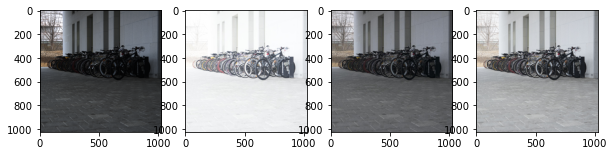

In [51]:
f, axarr = plt.subplots(1,4,figsize=(10,10))
axarr[0].imshow(imageio.imread(test_img_hdr[0], format='HDR-FI'))
axarr[1].imshow(imageio.imread(test_img_ldr[0]))
axarr[2].imshow(imageio.imread(test_img_ldr[1]))
axarr[3].imshow(imageio.imread(test_img_ldr[2]))

In [123]:
img_hdr = imageio.imread(test_img_hdr[0], format='HDR-FI')
img_ldr = imageio.imread(test_img_ldr[0])
np.max(img_hdr)/np.min(img_hdr),np.max(img_ldr)/np.min(img_ldr)

(250.82828, 10.625)

In [128]:
trans_tensor = transforms.ToTensor()
tensor_hdr = trans_tensor(img_hdr)
tensor_ldr = trans_tensor(img_ldr)
print(torch.max(tensor_hdr),torch.min(tensor_hdr),torch.max(tensor_ldr),torch.min(tensor_ldr))

tensor(1.5156) tensor(0.0060) tensor(1.) tensor(0.0941)


In [8]:


filename = "LDR-HDR-pair_Dataset-master/HDR/HDR_001.hdr"
im = cv2.imread(filename,cv2.IMREAD_ANYDEPTH)

tonemapDurand = cv2.createTonemap(2.2)
ldrDurand = tonemapDurand.process(im.copy())

new_filename = 'test' + ".jpg"
im2_8bit = np.clip(ldrDurand * 255, 0, 255).astype('uint8')
cv2.imwrite(new_filename, im2_8bit)

True

FileNotFoundError: No such file: '/home/pukothar/CSE251B/hdrPaired/HDR_project/test.jpg'

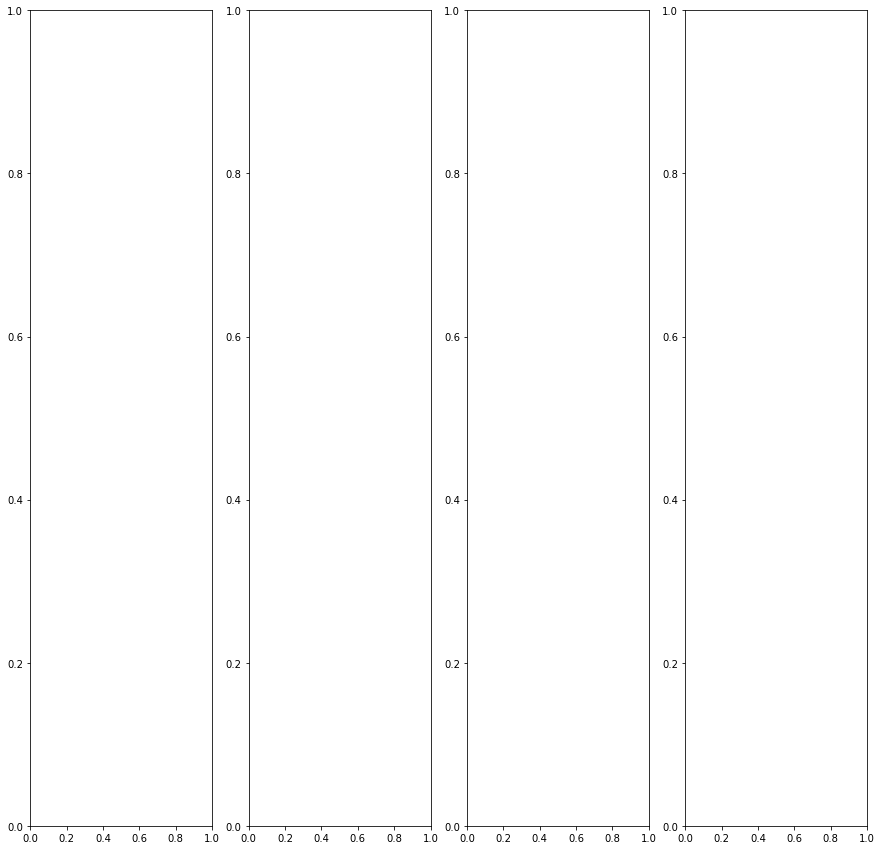

In [8]:
f, axarr = plt.subplots(1,4,figsize=(15,15))
#axarr[0].imshow(imageio.imread("LDR-HDR-pair_Dataset-master/HDR/HDR_001.hdr", format='HDR-FI'))
axarr[0].imshow(imageio.imread("test.jpg"))
axarr[1].imshow(imageio.imread("LDR-HDR-pair_Dataset-master/LDR_exposure_+2/LDR_001.jpg"))
axarr[2].imshow(imageio.imread("LDR-HDR-pair_Dataset-master/LDR_exposure_-2/LDR_001.jpg"))
axarr[3].imshow(imageio.imread("LDR-HDR-pair_Dataset-master/LDR_exposure_0/LDR_001.jpg"))

In [12]:
!python experiment.py

Running Experiment:  default
  0%|                                                    | 0/47 [00:00<?, ?it/s]/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100%|███████████████| 47/47 [00:45<00:00,  1.03it/s, D_fake=0.156, D_real=0.746]
Figure(1500x1500)
SSIM =  0.0940334761573277
PSNR =  15.698316196600596
UQI =  0.9570978996718327
Figure(640x480)
Figure(640x480)
Epoch: 1, Train Loss: 543.310546875, Gen Val Loss: 0.14662708342075348, Took 0:01:25.823318, ETA: 0:12:52.409862

Epoch: 1, Train Loss: 0.38583996891975403, Disc Val Loss: 0.14662708342075348, Took 0:01:25.823318, ETA: 0:12:52.409862

100%|███████████████| 47/47 [00:37<00:00,